In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [8]:
# Create a DataFrame with the scaled data
df_scaled_data = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
crypto_names = df_market_data.index
# Set the coinid column as index
df_scaled_data.index = crypto_names

# Display sample data
df_scaled_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [10]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using df_scaled_data
    kmeans.fit(df_scaled_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values to verify
print(inertia_values)


c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

[287.0, 195.82021818036043, 123.19048183836956, 79.02243535120975, 65.302379141625, 52.88851821977532, 43.91469044757746, 37.51703249010357, 32.485240832183536, 28.22289929060893, 24.545512769147678]


In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

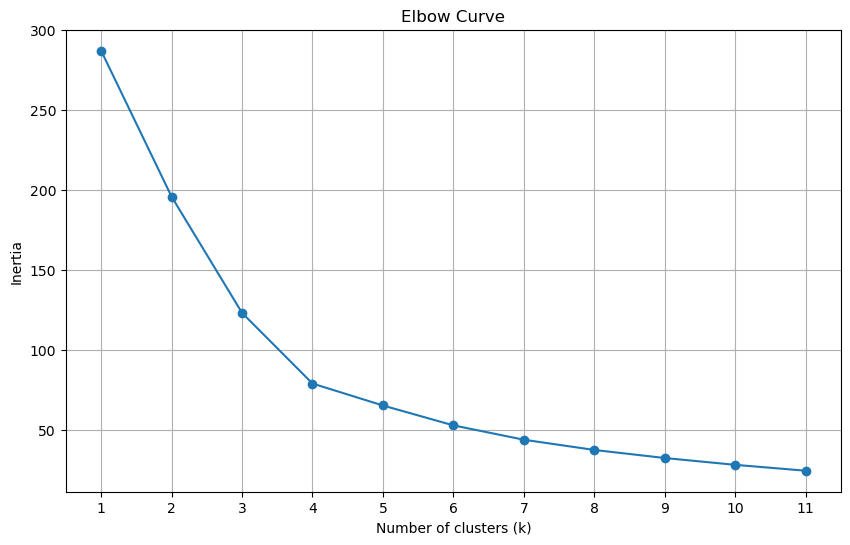

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the analysis of the elbow curves for both the original scaled data and the PCA-transformed data, the best value for k appears to be 4. This is where the inertia starts to decrease at a slower rate, indicating that adding more clusters beyond this point provides diminishing returns in terms of reducing inertia.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Based on the elbow curve, assume the best value for k is 4
best_k = 4

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0, n_init=10)

In [14]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled_data)

c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=0)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(df_scaled_data)

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [16]:
# Create a copy of the DataFrame
df_clustered = df_market_data.copy()


In [17]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered["cluster"] = predicted_clusters

# Display sample data
df_clustered.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


In [18]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    width=800,
    height=400
)
# Display the scatter plot
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled_data)
# View the first five rows of the DataFrame. 
df_pca_data = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=df_market_data.index)

# Display the first five rows of the PCA DataFrame
df_pca_data.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
print("Explained Variance Ratios for each Principal Component:")
print(f"PC1: {explained_variance[0]:.4f}")
print(f"PC2: {explained_variance[1]:.4f}")
print(f"PC3: {explained_variance[2]:.4f}")

# Calculate the total explained variance by summing the individual variances
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Explained Variance Ratios for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760
Total Explained Variance: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**Explained Variance Ratios for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760
Total Explained Variance: 0.8950

In [22]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=df_market_data.index)


# Copy the crypto names from the original data
crypto_names = df_market_data.index


# Set the coinid column as index
df_pca_data.index = crypto_names

# Display sample data
df_pca_data.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list to verify
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [24]:
# Create an empty list to store the inertia values
pca_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    pca_kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # 2. Fit the model to the data using df_pca_data
    pca_kmeans.fit(df_pca_data)
    
    # 3. Append the model.inertia_ to the inertia list
    pca_inertia_values.append(pca_kmeans.inertia_)
# Display the inertia values to verify
print(pca_inertia_values)

c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known

[256.87408556789256, 165.9019940203601, 93.77462568057295, 49.66549665179736, 37.87874703346248, 27.618971787957435, 21.182775862957325, 17.38982320476889, 13.593650379876731, 10.55935756279343, 8.007418066730592]


In [25]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": k_values, "inertia": pca_inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_pca_elbow = pd.DataFrame(pca_elbow_data)

# Display the DataFrame to verify
df_pca_elbow.head()


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


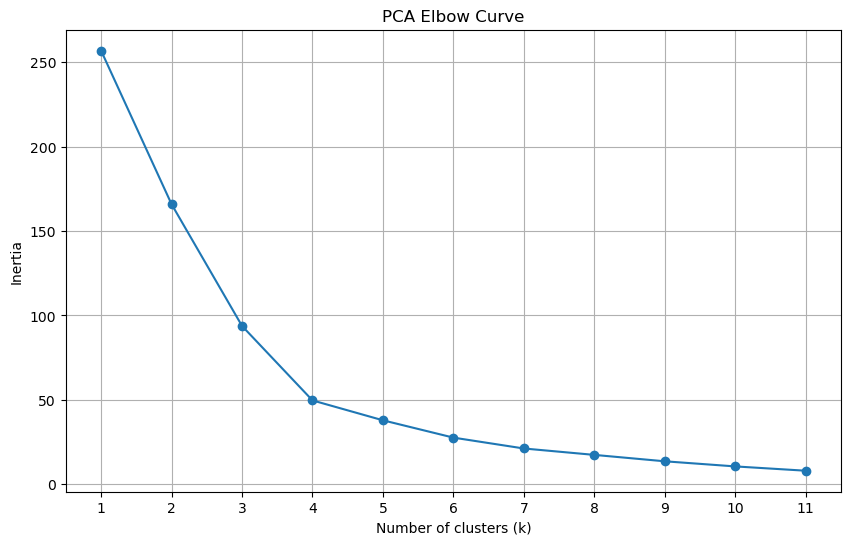

In [26]:
# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_pca_elbow["k"], df_pca_elbow["inertia"], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('PCA Elbow Curve')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**The best value for k when using the PCA data is 4. (Verify this with your elbow curve.)


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ. The best value for k is 4 for both the original scaled data and the PCA data. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Based on the elbow curve, assume the best value for k is 4
best_k = 4

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0, n_init=10)

In [28]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca_data)

c:\Users\Sarah Son Kim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=0)

In [29]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_model.predict(df_pca_data)
# Print the resulting array of cluster values.
print(predicted_clusters_pca)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [30]:
# Create a copy of the DataFrame with the PCA data
df_pca_clustered = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clustered["cluster"] = predicted_clusters_pca

# Display sample data
df_pca_clustered.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [31]:
# Create a scatter plot using hvPlot
scatter_plot_pca = df_pca_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="PCA Cryptocurrency Clusters",
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot_pca


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [32]:
# Composite plot to contrast the Elbow curves
# Plot the Elbow curve for the original scaled data
elbow_plot_original = df_elbow.hvplot.line(
    x='k', y='inertia', 
    title='Elbow Curve - Original Scaled Data', 
    xlabel='Number of clusters (k)', 
    ylabel='Inertia', 
    width=400, height=400
)

# Plot the Elbow curve for the PCA-transformed data
elbow_plot_pca = df_pca_elbow.hvplot.line(
    x='k', y='inertia', 
    title='Elbow Curve - PCA Data', 
    xlabel='Number of clusters (k)', 
    ylabel='Inertia', 
    width=400, height=400
)

# Combine the two plots into a composite plot
composite_elbow_plot = elbow_plot_original + elbow_plot_pca

# Display the composite plot
composite_elbow_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [33]:
# Composite plot to contrast the clusters
# Create a scatter plot for the original scaled data clusters
scatter_plot_original = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters - Original Scaled Data",
    width=400,
    height=400
)

# Create a scatter plot for the PCA-transformed data clusters
scatter_plot_pca = df_pca_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters - PCA Data",
    width=400,
    height=400
)

# Combine the scatter plots into a composite plot
composite_scatter_plot = scatter_plot_original + scatter_plot_pca

# Display the composite plot
composite_scatter_plot

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Original Scaled Data Clusters: The clusters formed might reflect the detailed nuances captured by the multiple original features. However, these clusters can be more dispersed and harder to interpret visually.

PCA-Transformed Data Clusters: The clusters are based on the principal components and usually show more distinct and tighter groupings. These clusters can provide a clearer understanding of the main variance in the data but might miss some specific details present in the original features.

By comparing the scatter plots of both the original and PCA-transformed data, you can see these differences. The PCA-based clusters typically show a clearer and more consolidated pattern, indicating that PCA effectively captures the primary variance directions in the data.